# Neural Networks

## Perceptron Algorithm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read data
data = pd.read_csv('data.csv', header=None, names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [4]:
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [5]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns the final W and b
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
    return W, b


In [6]:
def plot_line(W, b, x1_range=(0,1)):
    X = [[], []]
    X[0] = np.linspace(x1_range[0], x1_range[1])
    X[1] = (-b - W[0]*X[0])/W[1]
    return X

In [7]:
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

W, b = trainPerceptronAlgorithm(X, y, num_epochs=25)
print('W', W)
print('b', b)

W [[-0.41144508]
 [-0.22328717]]
b 0.3019939418114037


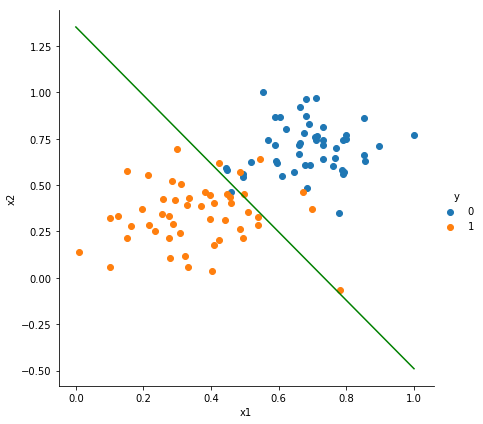

In [8]:
g = sns.FacetGrid(data, height=6, hue="y")
g = g.map(plt.scatter, "x1", "x2")
g.add_legend()
X = plot_line(W, b)
plt.plot(X[0], X[1], 'g')

### Definitions

In [9]:
def softmax(L):
    den = np.sum(np.exp(L))
    return [np.exp(x)/den for x in L]

In [10]:
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

## Multilayer Neural Networks

### Feed forward

Implement a forward pass through a 4x3x2 network, with sigmoid activation functions for both layers.

In [28]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))

# Make a forward pass through the network

hidden_layer_in = np.matmul(weights_input_to_hidden.T, X)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.matmul(weights_hidden_to_output.T, hidden_layer_out)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]
